In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '/home/laura/Documents/stage2018')
from utils2 import *

In [2]:
training_set = LabeledSet(2)

training_set.addExamples(np.array([[1, 3], [1, 4], [1, 8]]), 1)
training_set.addExamples(np.array([[5, 3], [3, 0], [3, 6]]), 2)
training_set.addExamples(np.array([[9, 6], [9, 7], [6, 0], [6, 3]]), 3)

In [3]:
df =training_set.get_df()
df

,0,1,2
0,1,3,1
1,1,4,1
2,1,8,1
3,5,3,2
4,3,0,2
5,3,6,2
6,9,6,3
7,9,7,3
8,6,0,3
9,6,3,3


In [4]:
training_set.addExample([9,0], 5)

In [5]:
monotone_values = np.random.uniform(0, 10, size=(3,1))
random_values = np.random.uniform(0, 1, size=(3, 1))
values = np.hstack((random_values, monotone_values))
values

array([[0.88930804, 3.37904984],
       [0.87225166, 3.49239156],
       [0.90572165, 4.63401008]])

In [6]:
for i in range(3):
    training_set.addExample(values[i].tolist(), 9)

In [7]:
f = Avgdsr()

for i in range(training_set.size()):
    print(f.value(i, df[1], df[2]))

0.7575757575757575
1.0
1.0
0.7575757575757575
0.5476190476190476
0.625
0.625
0.5
0.5476190476190476
0.7575757575757575
0.5476190476190476
0.375
0.2857142857142857
0.2


In [8]:
f = Dsr()
for i in range(training_set.size()):
    print(f.dominant_set(df[1], df[1][i]))

Int64Index([0, 1, 2, 3, 5, 6, 7, 9, 11, 12, 13], dtype='int64')
Int64Index([1, 2, 5, 6, 7, 13], dtype='int64')
Int64Index([2], dtype='int64')
Int64Index([0, 1, 2, 3, 5, 6, 7, 9, 11, 12, 13], dtype='int64')
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')
Int64Index([2, 5, 6, 7], dtype='int64')
Int64Index([2, 5, 6, 7], dtype='int64')
Int64Index([2, 7], dtype='int64')
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')
Int64Index([0, 1, 2, 3, 5, 6, 7, 9, 11, 12, 13], dtype='int64')
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')
Int64Index([1, 2, 5, 6, 7, 11, 12, 13], dtype='int64')
Int64Index([1, 2, 5, 6, 7, 12, 13], dtype='int64')
Int64Index([2, 5, 6, 7, 13], dtype='int64')


In [9]:
minf = Mindsr()
for i in range(training_set.size()):
    print(minf.value(i, df[0], df[2]))

1.0
1.0
1.0
1.0
1.0
1.0
0.3333333333333333
0.3333333333333333
1.0
1.0
0.3333333333333333
0.15384615384615385
0.21428571428571427
0.08333333333333333


In [10]:
minf = Mindsr()
for i in range(training_set.size()):
    print(minf.value(i, df[1], df[2]))

0.5454545454545454
1.0
1.0
0.5454545454545454
0.2857142857142857
0.5
0.5
0.5
0.2857142857142857
0.5454545454545454
0.2857142857142857
0.375
0.2857142857142857
0.2


In [11]:
f_layer = Dsr()
g_layer_shannon = Log()
h_layer = Sum()

rsdm = Gdm(h_layer, g_layer_shannon, f_layer)

print("Rank Shannon discrimination measure generated by second attribute : " , rsdm.value(df[1], df[2]))

Rank Shannon discrimination measure generated by second attribute :  0.875420849970829


In [12]:
df[2][0]

1.0

splitting value generated by rsdm on axis 0 :  5.5
corresponding entropy :  0.7166339477969733
splitting value generated by sdm on axis 0 :  2.0
corresponding entropy :  1.2317937498454663


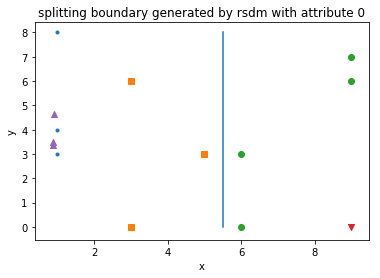

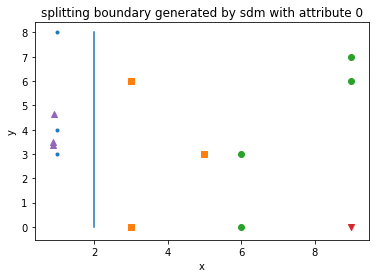

In [13]:
# rsdm 
f = Dsr()
g = Log()
h = Sum()

rsdm = Gdm(h, g, f)

# sdm
f = Ds()
g = Log()
h = Sum()

sdm = Gdm(h, g, f)

threshold_r, entropy_r = discretize(rsdm, df[0], df[2])
print("splitting value generated by rsdm on axis 0 : ", threshold_r)
print("corresponding entropy : ", entropy_r)

threshold_nr, entropy_nr = discretize(sdm, df[0], df[2])
print("splitting value generated by sdm on axis 0 : ", threshold_nr)
print("corresponding entropy : ", entropy_nr)

display_discretization(training_set, threshold_r, 0, "splitting boundary generated by rsdm with attribute 0")
display_discretization(training_set, threshold_nr, 0, "splitting boundary generated by sdm with attribute 0")

splitting value generated by rsdm on axis 0 :  3.1895249204923046
corresponding entropy :  0.7238717985967198
splitting value generated by sdm on axis 0 :  1.5
corresponding entropy :  1.8959980571916673


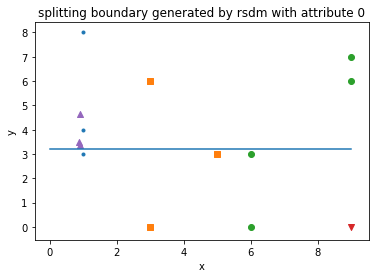

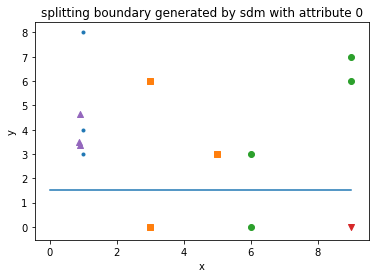

In [14]:
# rsdm 
f = Dsr()
g = Log()
h = Sum()

rsdm = Gdm(h, g, f)

# sdm
f = Ds()
g = Log()
h = Sum()

sdm = Gdm(h, g, f)

threshold_r, entropy_r = discretize(rsdm, df[1], df[2])
print("splitting value generated by rsdm on axis 0 : ", threshold_r)
print("corresponding entropy : ", entropy_r)

threshold_nr, entropy_nr = discretize(sdm, df[1], df[2])
print("splitting value generated by sdm on axis 0 : ", threshold_nr)
print("corresponding entropy : ", entropy_nr)

display_discretization(training_set, threshold_r, 1, "splitting boundary generated by rsdm with attribute 0")
display_discretization(training_set, threshold_nr, 1, "splitting boundary generated by sdm with attribute 0")

In [15]:
set2, t = generate_2Ddataset(0, 2, 1000, 0.4, 0.1, [[-10, 10], [-10, 10]])
df2 = set2.get_df()

In [16]:
df2

,0,1,2
0,-10.000000,-0.317251,1.0
1,-8.162720,-7.711049,1.0
2,-10.000000,-8.567275,1.0
3,0.527396,-9.486879,1.0
4,-0.031912,-7.178806,1.0
5,-10.000000,1.322748,1.0
6,-10.000000,0.898516,1.0
7,-9.351083,2.745446,1.0
8,-4.819887,0.564257,1.0
9,-10.000000,6.109425,1.0


In [25]:
start = time.time()
set2, t = generate_2Ddataset(0, 2, 1000, 0.6, 0.1, [[-10, 10], [-10, 10]])
df2 = set2.get_df()
t1, h1 = discretize(rsdm, df2[0], df2[2])

print("running time : ", format(time.time() - start))

running time :  107.3410439491272
